In [2]:
#Q4 For the chosen dataset, build a CNN model with at least 80%accuracy.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


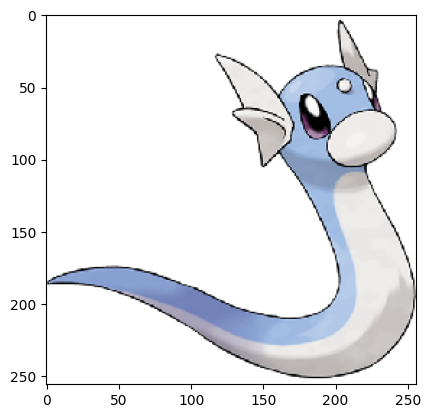

In [5]:
import matplotlib.pyplot as plt
im=plt.imread('/content/drive/MyDrive/TERM-4/DEEP LEARNING/ca/archive (3)/pokemon/pokemon/147.png')
plt.imshow(im)
plt.show()

In [20]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
import splitfolders
splitfolders.ratio("/content/drive/MyDrive/TERM-4/DEEP LEARNING/ca/archive (3)/pokemon",output="output",seed=1337,ratio=(.8,.2))

Copying files: 819 files [00:14, 58.33 files/s] 


In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [28]:
from keras.preprocessing.image import ImageDataGenerator

train_data = ImageDataGenerator()
train_generator = train_data.flow_from_directory(
    "/content/output/train",
    target_size=(150, 150),
    batch_size=20,
    class_mode="binary"
)

validation_data = ImageDataGenerator()
validation_generator = validation_data.flow_from_directory(
    "/content/output/val",
    target_size=(150, 150),
    batch_size=20,
    class_mode="binary"
)


Found 655 images belonging to 2 classes.
Found 164 images belonging to 2 classes.


In [31]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
img_input=layers.Input(shape=(150,150,3))
x=layers.Conv2D(16,3,activation='relu')(img_input)
x=layers.MaxPooling2D(2)(x)
x=layers.Conv2D(32,3, activation='relu')(x)
x=layers.MaxPooling2D(2)(x)
x=layers.Conv2D(64,3,activation='relu')(x)
x=layers.MaxPooling2D(2)(x)
x=layers.Conv2D(128,3,activation='relu')(x)
x=layers.MaxPooling2D(2)(x)
x=layers.Flatten()(x)
x=layers.Dense(512,activation='relu')(x)
x=layers.Dropout(0.5)(x)
output=layers.Dense(1,activation='sigmoid')(x)
model=Model(img_input,output)

In [32]:
import tensorflow

In [33]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.optimizers import Adadelta


In [34]:
model.compile(loss='binary_crossentropy',
optimizer=Adadelta(),
metrics=['acc'])


In [35]:
history=model.fit(train_generator,
epochs=5,
validation_data=validation_generator,
)

Epoch 1/5
33/33 [==============================] - 15s 81ms/step - loss: 13.3953 - acc: 0.4107 - val_loss: 0.7425 - val_acc: 0.8476
Epoch 2/5
33/33 [==============================] - 2s 59ms/step - loss: 3.9773 - acc: 0.7389 - val_loss: 0.0185 - val_acc: 0.9878
Epoch 3/5
33/33 [==============================] - 2s 62ms/step - loss: 1.5455 - acc: 0.8687 - val_loss: 3.8770e-05 - val_acc: 1.0000
Epoch 4/5
33/33 [==============================] - 3s 91ms/step - loss: 0.8123 - acc: 0.9344 - val_loss: 3.4617e-07 - val_acc: 1.0000
Epoch 5/5
33/33 [==============================] - 2s 60ms/step - loss: 0.6964 - acc: 0.9420 - val_loss: 2.6668e-09 - val_acc: 1.0000


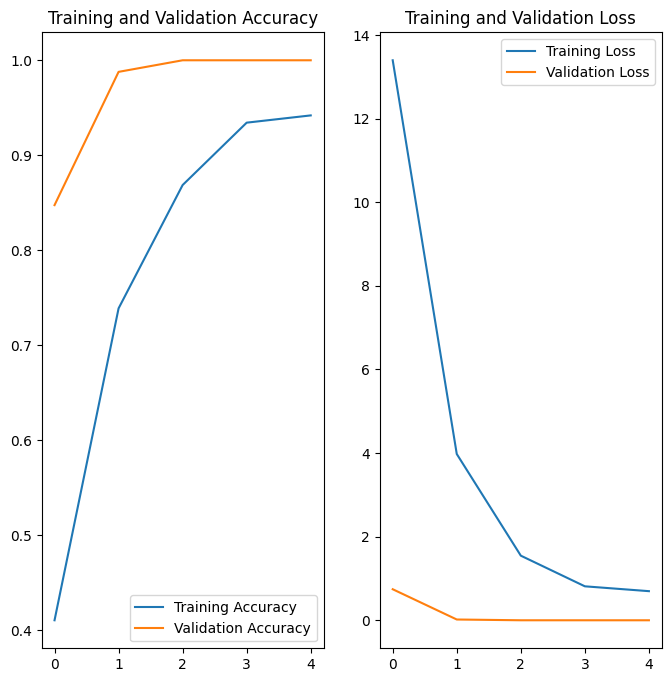

In [36]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range=range(5)
plt.figure(figsize=(8,8))



plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()